# ML Regression

In [245]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv' 

In [247]:
if not os.path.isfile("data.csv"):
    !wget $data_url #download data
else :
    print("data.csv file already exist.")

data.csv file already exist.


In [248]:
!ls

car-price-regression.ipynb  data.csv


### Read data and preview the first few rows

In [249]:
df = pd.read_csv("data.csv")

In [250]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### make all columns consistent 

In [251]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [252]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Find all string columns and standardize the values 

In [253]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [254]:
obj_columns = list(df.dtypes[df.dtypes == 'object'].index)
obj_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [255]:
for col in obj_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [256]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Look at each column to see kinds of values

In [257]:
for col in df.columns:
    print(col)
    # print(df[col].unique()[:10])
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

make
48
make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren            

<Axes: xlabel='msrp', ylabel='Count'>

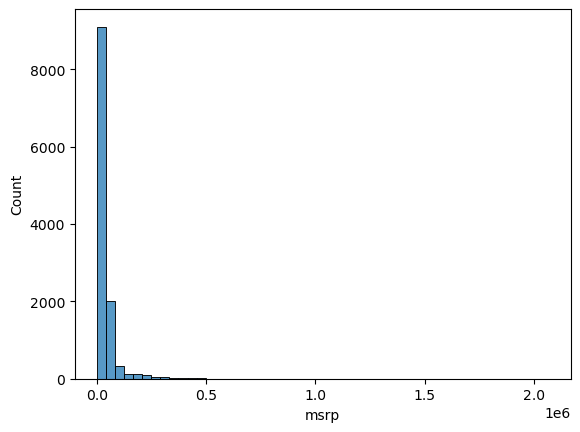

In [258]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

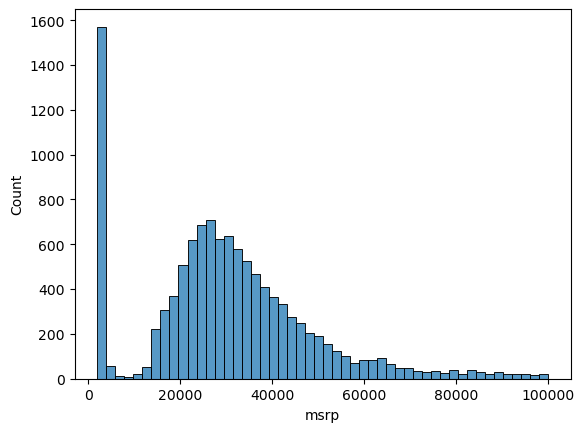

In [259]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

### remove long tail by doing log transformation

<Axes: xlabel='msrp', ylabel='Count'>

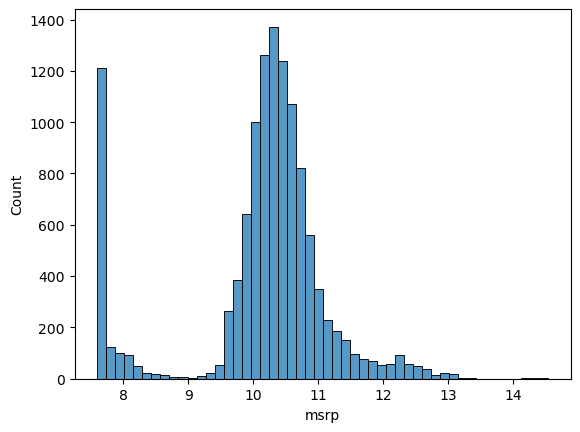

In [260]:
prices = np.log1p(df.msrp)
sns.histplot(prices, bins=50)

### look at missing values

In [261]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### validation framework

In [262]:
n = df.shape[0]

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_val, n_test, n_train)
n, n_val + n_test + n_train

2382 2382 7150


(11914, 11914)

### extract new df for train, val and testing

In [263]:
idx = np.arange(n) # generating index from 0 -> n-1

In [264]:
np.random.seed(2)
np.random.shuffle(idx) # shuffle the idx

In [265]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [266]:
df_train = df.iloc[idx[:n_train]]
print(df_train.shape[0])
df_train.head()

7150


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [267]:
df_val = df.iloc[idx[n_train:n_train+n_val]]
print(df_val.shape[0])
df_val.head()

2382


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [268]:
df_test = df.iloc[idx[n_train+n_val:]]
print(df_test.shape[0])
df_test.head()

2382


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


### extract the target variables for each dataframe 

In [269]:
y_train = np.log1p(df_train.msrp.values)
del df_train['msrp']

y_val = np.log1p(df_val.msrp.values)
del df_val['msrp']

y_test = np.log1p(df_test.msrp.values)
del df_test['msrp']

In [270]:
y_train[:5], y_val[:5], y_test[:5]

(array([ 9.57574708,  9.887663  ,  9.89323518,  7.60140233, 10.93775686]),
 array([10.19936098, 10.90872279,  9.72770457, 10.65963301, 10.16569796]),
 array([ 7.60140233,  8.07464908, 10.34563811,  7.60140233, 10.30581441]))

## basic linear regression formular

$g(xi) = w0 + \sum_{j=0}^{N-1}w_{i}*xi_{j} $

In [271]:
w0 = 7.17
w = [0.01,0.04,0.002]
xi = [453, 11, 86]

In [272]:
def linear_regression(xi):
    n = len(xi)

    pred = w0
    for i in range(n):
        pred = pred + w[i]*xi[i]
    return pred


In [273]:
pred = linear_regression(xi)
pred

12.312

In [274]:
np.expm1(pred)  #reverse of np.log1p

222347.2221101062

### linear_regression vector form

$g(xi) = w0 + \sum_{j=0}^{N-1}w_{i}*xi_{j} $

$g(xi) = w0 + x_{i}^T*w $

In [275]:
def dot(xi, w):
    n = len(xi)
    
    result = 0.0

    for i in range(n):
        result = result + w[i]*xi[i]
    return result

In [276]:
def linear_regression(xi):
    return w0 + dot(xi, w)


In [277]:
linear_regression(xi)

12.312000000000001

In [278]:
w_new = [w0] + w

In [279]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)


In [280]:
linear_regression(xi)

12.312

## sample of a full features with known weights

In [281]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [282]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]
X = [x1, x2, x3]
X = np.array(X)

In [283]:
def linear_regression(X): 
    return X.dot(w_new) #predictions 

In [284]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### training a model - finding the w

In [285]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

### baseline model

In [286]:
df_train.dtypes[df_train.dtypes != "O"] # features that are not objects

year                  int64
engine_hp           float64
engine_cylinders    float64
number_of_doors     float64
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [287]:
base_feature = ['engine_hp', 'engine_cylinders',
       'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base_feature]
X_train = X_train.fillna(0) #remove empty values

In [289]:
w0, w = train_linear_regression(X_train, y_train)

In [290]:
w0, w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

## compare predictions with actual values 

In [296]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

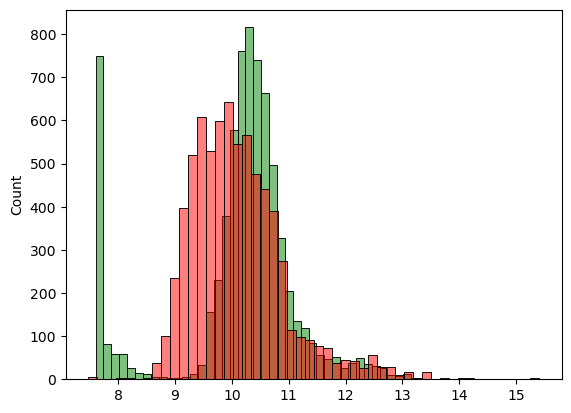

In [299]:
sns.histplot(y_train, color="green", alpha=0.5, bins=50)
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)

#predictions is most wrong, model not doing well